<a href="https://colab.research.google.com/github/MariaElisaOliveiraMartins/Curso_DS_Pro/blob/main/Aula4_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 04 
## Controle de qualidade de dados para Data Science

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Agenda

* A importância do controle de qualidade dos dados em Data Science

* Outliers

* Técnicas mais eficazes para controle de qualidade de dados

* Exercício prático: preparação de dados

### Porque é importante o controle de qualidade dos dados usados em Data Science?

* Garbage-in, garbage-out (GIGO)

In [ ]:
import pandas as pd # Declaração da biblioteca Pandas.
import numpy as np # Declaração da biblioteca NumPy.

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/Dados_DS/Planilha de Numeros.csv')

In [ ]:
df.describe()

In [ ]:
df.columns = ['col_1']
df['col_2'] = '' # Acrescenta nova coluna ao dataframe.


In [ ]:
df

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.info()
print(df.shape)

In [ ]:
df['col_2'] = np.random.rand(df.shape[0]) * 100000
df.info()


In [ ]:
for index, row in df.iterrows() : 
  df.loc[index, 'col_3'] = np.random.rand(1)

In [ ]:
df

In [ ]:
df.plot(y='col_1')

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.values)

In [ ]:
import seaborn as sbn

In [ ]:
sbn.boxplot(x=df,orient='vertical') # Exibe a concentração/dispersão dos valores em torno da média excluindo o out layer (desvio padrão).

In [ ]:
sbn.violinplot(x=df,orient='vertical') # Exibe a concentração/dispersão dos valores em torno da média excluindo o out layer (desvio padrão).

In [ ]:
# Exercício proposto : Neste lugar fazer um gráfico de disperção para verificar a distribuição dos dados da coluna 1, cujo desvio padrão é maior que a média.  .

In [ ]:
df[df.values > 10000]

* Tempo computacional
* Qualidade da apresentação dos resultados

### Evitando "garbage" em Machine Learning

#### Dados imprecisos

#### Dados que refletem "preconceitos humanos"

#### Dados incompletos

#### Bias

#### Reflexos em:

* Treinamento
* Teste
* Estimativa

#### **Regra de ouro:** O analista de dados TEM QUE TER conhecimento sobre os dados que ele está analizando.

Quanto conhecimento?

Todo o conhecimento possível.

#### "Muitos problemas advém do fato do analista não conhecer os dados e também não conhecer as maneiras pelas quais eles falham". 
*Mikey Shulman, ider de machine-learning para a Kensho Technologies.*

#### "Causo" do inventário

### Outliers: técnicas para encontrar e remover

In [ ]:
import sklearn.datasets as sds # Importa a biblioteca Skit learning (machine learning) obtendo conjunto de dados prontos.
import pandas as pd            # Importa o Pandas.

In [ ]:
boston = sds.load_boston()  # Carrega a variável "boston" com o conjunto de dados obtidos na biblioteca (residências em Boston)
print(type(boston))         # Exibe a estrutura (tipo) do conjunto obtido (obs: não se trata de um dataframe).
x = boston.data             # Salva os dados do conjunto em "x".
y = boston.target           # Salva o objetivo do conjunto em "y".
columns = boston.feature_names  # Salva o nome das coluna do conjunto em "columns".

boston_df = pd.DataFrame(boston.data)  # Transforma os dados obtidos no conjunto em dataframe.
boston_df.columns = columns            # Atribui os nomes das colunas do conjunto às colunas do dataframe.
print(boston_df.count())               # Exibe o número de linhas do dataframe.
boston_df.head()                       # Exibe o cabeçalho (nome das colunas e primeiras 6 linhas de dados do dataframe)


<class 'sklearn.utils.Bunch'>
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Descrição: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

* CRIM - taxa de criminalidade per capita por cidade
* ZN - proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados.
* INDUS - proporção de acres não comerciais por cidade.
* CHAS - Variável fictícia Charles River (1 se o trecho limita o rio; 0 caso contrário)
* NOX - concentração de óxidos nítricos (partes por 10 milhões)
* RM - número médio de quartos por habitação
* AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
* DIS - distâncias ponderadas para cinco centros de emprego em Boston
* RAD - índice de acessibilidade às rodovias radiais
* TAX - taxa de imposto sobre a propriedade de valor total por \$10,000
* PTRATIO - proporção aluno-professor por cidade
* B - 1000(Bk - 0.63)^2 em que Bk é a proporção de negros por cidade
* LSTAT - /% menor status da população
* MEDV - Valor médio das casas ocupadas pelos proprietários em US $ 1000

**Método 1:** Boxplot

In [ ]:
print (boston_df.DIS.describe())    # Exibe o resumo estatístico do dataframe com foco na distância das residências (DIS).
print (boston_df.DIS.median())      # Exibe o valor da mediana. 

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64
3.2074499999999997


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


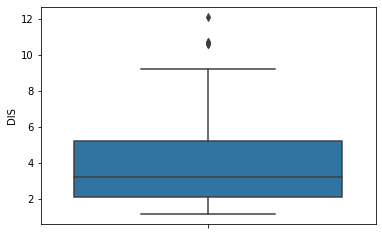

In [ ]:
import seaborn as sns                           # Importa a biblioteca seaborn
sns.boxplot(x=boston_df['DIS'], orient='vert')  # Analisa os out-layers sob a ótica da distância em relação aos centros de emprego em Boston.

**Método 2:** Análise de correlação

In [ ]:
print (boston_df.DIS.describe())    # Exibe o resumo estatístico do dataframe com foco na distância das residências (DIS).

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64


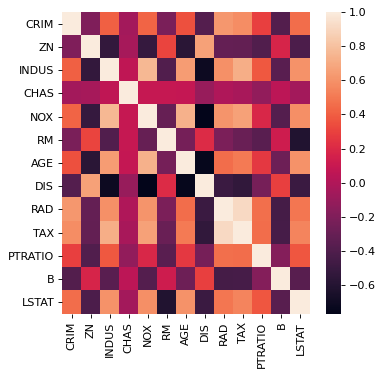

In [ ]:
import matplotlib.pyplot as plt             # Importa as funções de visualização (plotagem) da biblioteca "matplotlib".
%matplotlib inline

plt.figure(figsize= (5,5), dpi=80)          # Configura as dimensões do gráfico a ser exibido.
sns.heatmap(boston_df.corr())               # Aplica a função "heatmap" a qual exibe todas as correlações exitente entre os dados do dataframe.

plt.savefig('/content/drive/My Drive/Curso Data Science/DS Pro/Exercícios/aula 4/Exemplo de heatmap.png') # Salva uma imagem (PNG) do gráfico gerado no drive do Google.

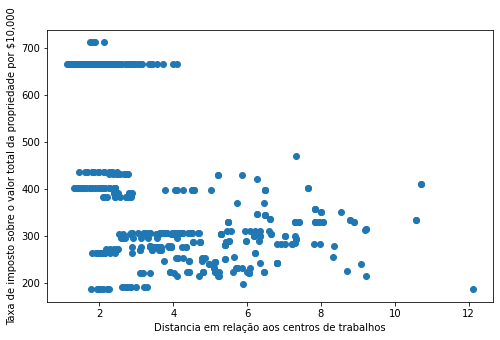

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))                  # Aplica configurações para exibição do gráfico de dispersão.
ax.scatter(boston_df['DIS'], boston_df['TAX'])         # Seleciona as informações a serem analisadas na correlação.

ax.set_xlabel('Distancia em relação aos centros de trabalhos')   # Define um rótulo explicativo para o eixo X.  
ax.set_ylabel('Taxa de imposto sobre o valor total da propriedade por $10,000') # Define um rótulo explicativo para o eixo Y.
plt.show()                                              # Exibe o gráfico de dispersão da correlação.

**Método 3:** Usando uma função matemática para descobrir outliers

**Teste Z (Z-Score)**

Teste estatístico que pressupõe que a distribuição dos valores se aproxima da Distribuição Normal.

**Distribuição Normal**

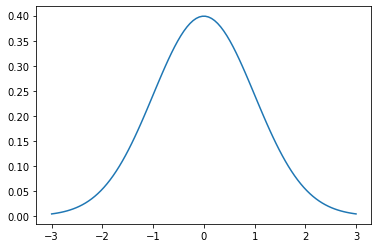

In [ ]:
import numpy as np                                # Importa a biblioteca NumPy.
import scipy.stats as stats                       # Importa a biblioteca SCIPY.
import math                                       # Importa a biblioteca Math.

mu = 0                                     # Definição clássica da média da curva normal Z-Score ( média = 0 ).
variance = 1                               # Definição clássica da variância em uma curva normal Z-Score ( variância = 1 ). 
sigma = math.sqrt(variance)                # Obtem a raiz quadrada da variância para calcular a amplitude do gráfico. 
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # Calculo a amplitude do gráfico no eixo "X".
plt.plot(x, stats.norm.pdf(x, mu, sigma))         # Aplica o calculo efetuado na função de plotagem de uma curva normal.
plt.show()                                        # Exibe a curva normal.

#### Verificando se a distribuição é normal



(array([150., 111.,  81.,  61.,  46.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.1296 ,  2.22929,  3.32898,  4.42867,  5.52836,  6.62805,
         7.72774,  8.82743,  9.92712, 11.02681, 12.1265 ]),
 <a list of 10 Patch objects>)

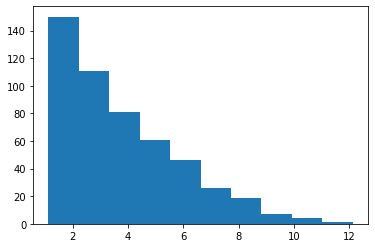

In [ ]:
plt.hist(boston_df.DIS)  # Exibe o histograma de uma dada informação p/ verificar a viabilidade da aplicação do método Z-Score.

In [ ]:
from scipy import stats              # Importa a função "stats" (aplicação da distribuição normal) da biblioteca scipy.
z = np.abs(stats.zscore(boston_df))  # Aplica a distribuição normal sobre os dados do dataframe.
print(z)                             # Exibe o resultado (numérico) da distribuição aplicada.

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [ ]:
threshold = 3              # Define o limite (devio) a ser considerado na seleção dos out-layers (acima e baixo da média).
print(np.where(z > 3))     # Exibe os out-layers encontrados com base no limite definido.

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

**Saída:** O primeiro array contém uma lista de linhas e o segundo array uma lista de colunas. Assim, z[55][1] tem um Z-score maior que três. Isso significa que, se considerarmos o valor do limiar = 3, esse dado é um outlier.

In [ ]:
z[55][1] # Exibe o valor de um out-layers com base no método Z-Score (ponto da matriz definida pelos índices selecionados).

3.375038763517309

**Método 4:** Score IQR (Faixa interquartis)

*IQR = Q3 − Q1*

In [ ]:
Q1 = boston_df.quantile(0.25)    # Define o quantil inferior a ser considerado na seleção dos out-layers (abaixo média).
Q3 = boston_df.quantile(0.75)    # Define o quantil superior a ser considerado na seleção dos out-layers (p/ cima e p/ baixo da média).
IQR = Q3 - Q1                    # Calcula o intervalo entre quantis desconsiderando os out-layers.
print(IQR)                       # Exibe as quantidades de informações entre os quantis definidos.


CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


#### Removendo os outliers

a) Encontrados pela distribuição normal

In [ ]:
print(boston_df.shape)                        # Exibe a dimensão do dataframe antes da exclusão dos out-layesr.
boston_df_o = boston_df[(z < 3).all(axis=1)]  # Aplica a exclusão dos out-layers com base no desvio definido.
print(boston_df_o.shape)                      # Exibe a dimensão do dataframe depois da exclusão dos out-layesr.

(506, 13)
(415, 13)


b) Encontrado pelo IQR

In [ ]:
boston_df_out = boston_df_o[~((boston_df_o < (Q1 - 1.5 * IQR)) |(boston_df_o > (Q3 + 1.5 * IQR))).any(axis=1)] # Exclui os out-layers com base nos quantis definidos.
print(boston_df_out.shape)   # Exibe a dimensão do dataframe resultante para avaliar a eficácia do método sobre os dados.

(274, 13)
